In [1]:
# k-Means Clustering

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# allows chars to appear in notebook
%matplotlib inline

In [16]:
dataset = pd.read_csv('cars2.csv')


In [17]:
x = dataset[:-1]
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,Time-to60,year,brand
0,14.0,8,350,165,4209.0,12,1972,toyota
1,31.9,4,89,71,1925.0,14,1980,honda
2,17.0,8,302,140,3449.0,11,1971,toyota
3,15.0,8,400,150,3761.0,10,1971,toyota
4,30.5,4,98,63,2051.0,17,1978,toyota


In [34]:
x = dataset[dataset.columns[:-1]]

x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,Time-to60,year
0,14.0,8,350,165,4209.0,12,1972
1,31.9,4,89,71,1925.0,14,1980
2,17.0,8,302,140,3449.0,11,1971
3,15.0,8,400,150,3761.0,10,1971
4,30.5,4,98,63,2051.0,17,1978


In [36]:
# Eliminating null values

for i in x.columns:
    x[i] = x[i].fillna(int(x[i].mean()))
for i in x.columns:
    print(x[i].isnull().sum())

0
0
0
0
0
0
0


<ipython-input-36-f80963f9261f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = x[i].fillna(int(x[i].mean()))


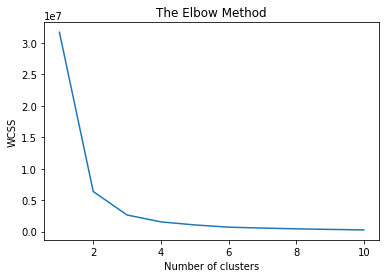

In [43]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# applying k-means to the cars dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)
x = x.values

<function matplotlib.pyplot.show(close=None, block=None)>

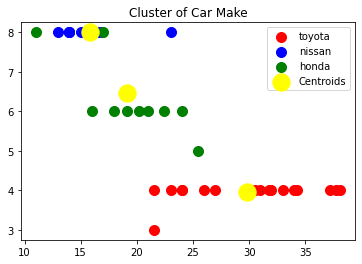

In [53]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s=100, c='red', label='toyota')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s=100, c='blue', label='nissan')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s=100, c='green', label='honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Centroids')
plt.title('Cluster of Car Make')
plt.legend()
plt.show